# Resampled ship passes in time
- break AIS data up into discrete ship sample events
- uniformly resample each ship pass (using linear interpolation)

In [1]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import datetime
import numpy as np
import seaborn as sns
import datetime
import plotly.express as px
import plotly
import plotly.graph_objects as go
import pickle
import AIS_tools
import scipy
import pickle
import math as m
import geopy

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
# Get raw AIS data
df = AIS_tools.get_AIS_data()

In [3]:
# Break data into list of ship passes
ship_passes = AIS_tools.single_ship_pass(df)

Complete                     


In [ ]:
# Uniformly resample in time
all_ships = AIS_tools.resample_time_all(ship_passes)

0.03570190641247833557

/Users/jhrag/opt/anaconda3/envs/ooi_dev/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: invalid value encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


0.494107452339688065

## Build array with time bins of 1 hour

In [79]:
R = 100 #km
bearing = np.zeros((52562,360))

base_time = np.datetime64('2015-01-01 00:00:00')
delT = np.timedelta64(1, 'h')

for k in range(52562):
    delT = np.timedelta64(k, 'h')
    start_time = pd.Timestamp(base_time + delT)
    end_time = pd.Timestamp(base_time + delT + np.timedelta64(1,'h'))
    
    df_t = all_ships[(all_ships['times'] > start_time.value) & (all_ships['times'] < end_time.value)]
    
    bearing_t = df_t[df_t['ranges (km)'] < R]['bearing']
    bearing_hist, bins = np.histogram(bearing_t, bins=360)
    bearing[k,:] = bearing_hist
    print(k/52562, end='\r')
    
# Save Bearing as Pickle File

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs


KeyboardInterrupt: 

In [86]:
bearing, bins = AIS_tools.get_time_histogram(all_ships, R=100, load_pkl=False)

In [91]:
bearing, bins = AIS_tools.get_time_histogram(load_pkl=True)

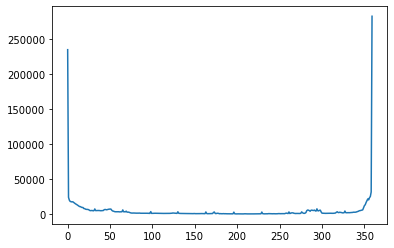

In [93]:
plt.plot(np.sum(bearing, axis=0))